<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2); line-height: 1.5;">
    <center style="color:white;font-size:35px;padding:15px"><b> ĐỒ ÁN CUỐI KỲ </b></center>
<center style="color:black;font-size:30px;padding:15px"><b> LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</b></center>
</div>


### Import các thư viện cần thiết

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


## Tiền xử lí + phân tích dữ liệu để trả lời câu hỏi

### Câu 1: Mức độ tương quan của các yếu tố ảnh hưởng đối với tuổi thọ trung bình là như thế nào?

- Tạo 1 list chứa tên các cột không ảnh hưởng tới tuổi thọ trung bình và tạo 1 dataframe mới từ **df** không chứa các cột đó
- Dùng hàm corr() để tính ma trận tương quan của từng cặp cột. Sau đó lấy ra các hệ số tương quan của các cột ảnh hưởng đối với cột "life_expect" 

In [18]:
# Lấy ra các cột không ảnh hưởng tới tuổi thọ trung bình
columns_to_exclude = ['country', 'country_code', 'region', 'year', 'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 'une_infant', 'une_life']

# Loại bỏ các cột đã được chọn
selected_df = df.drop(columns=columns_to_exclude)

# Chuyển kiểu dữ liệu qua numeric
selected_df = selected_df.apply(pd.to_numeric, errors='coerce')

# Tính toán ma trận tương quan với cột 'life_expect'
correlation_life_expect = selected_df.corr()['life_expect'].sort_values(ascending=False).drop('life_expect')
correlation_life_expect

basic_water        0.831099
une_literacy       0.738593
une_school         0.658362
doctors            0.651891
polio              0.646486
diphtheria         0.640473
measles            0.640408
age5-19obesity     0.621000
gghe-d             0.609787
une_gni            0.603019
bmi                0.597996
gni_capita         0.585603
alcohol            0.399797
hepatitis          0.341137
che_gdp            0.284920
une_edu_spend      0.261548
une_pop            0.032126
hospitals         -0.050087
une_hiv           -0.511821
age5-19thinness   -0.565396
une_poverty       -0.776992
Name: life_expect, dtype: float64

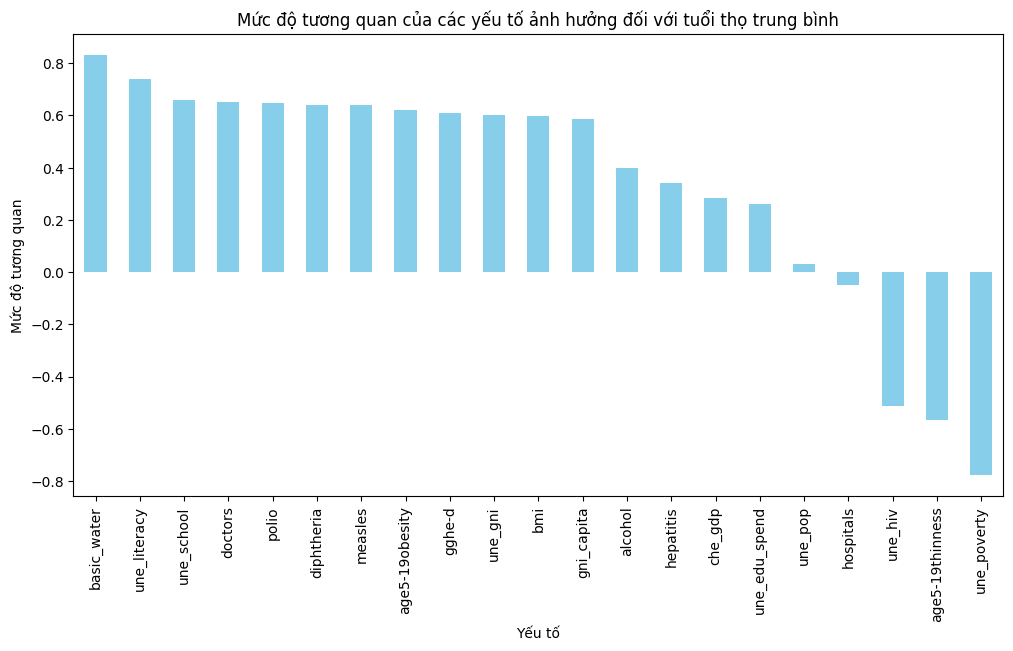

In [20]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
correlation_life_expect.plot(kind='bar', color='skyblue')
plt.title('Mức độ tương quan của các yếu tố ảnh hưởng đối với tuổi thọ trung bình')
plt.xlabel('Yếu tố')
plt.ylabel('Mức độ tương quan')
plt.show()

### Câu 2

### Câu 3